In [1]:
from azureml.core import Workspace, Datastore, Dataset
from azureml.core.authentication import InteractiveLoginAuthentication

Failure while loading azureml_run_type_providers. Failed to load entrypoint azureml.scriptrun = azureml.core.script_run:ScriptRun._from_run_dto with exception (cryptography 3.1.1 (c:\anaconda3\lib\site-packages), Requirement.parse('cryptography>=3.3.1; extra == "crypto"'), {'PyJWT'}).


In [2]:
tenant_id = '[TENANT_ID]'
subscription_id = '[SUBSCRIPTION_ID]'
resource_group = 'rg-datascience-machinelearning-peru'
workspace_name = 'mlw-msftlearn-dp100'

In [3]:
interactive_auth = InteractiveLoginAuthentication(tenant_id=tenant_id)
workspace = Workspace(subscription_id, resource_group, workspace_name, interactive_auth)

In [4]:
challenge_flight_df = Dataset.get_by_name(workspace,'challenge-flight').to_pandas_dataframe()

In [5]:
challenge_flight_df.count()

Year                 271940
Month                271940
DayofMonth           271940
DayOfWeek            271940
Carrier              271940
OriginAirportID      271940
OriginAirportName    271940
OriginCity           271940
OriginState          271940
DestAirportID        271940
DestAirportName      271940
DestCity             271940
DestState            271940
CRSDepTime           271940
DepDelay             271940
DepDel15             269179
CRSArrTime           271940
ArrDelay             271940
ArrDel15             271940
Cancelled            271940
dtype: int64

In [6]:
challenge_flight_df.head(10)

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,False,1824,13,False,False
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,False,740,22,True,False
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,False,1614,-7,False,False
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,True,1027,33,True,False
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,False,728,-9,False,False
5,2013,7,28,7,UA,12478,John F. Kennedy International,New York,NY,14771,San Francisco International,San Francisco,CA,1710,87,True,2035,183,True,False
6,2013,10,6,7,WN,13796,Metropolitan Oakland International,Oakland,CA,12191,William P Hobby,Houston,TX,630,-1,False,1210,-3,False,False
7,2013,7,28,7,EV,12264,Washington Dulles International,Washington,DC,14524,Richmond International,Richmond,VA,2218,4,False,2301,15,True,False
8,2013,10,8,2,AA,13930,Chicago O'Hare International,Chicago,IL,11298,Dallas/Fort Worth International,Dallas/Fort Worth,TX,1010,8,False,1240,-10,False,False
9,2013,5,12,7,UA,12478,John F. Kennedy International,New York,NY,12892,Los Angeles International,Los Angeles,CA,1759,40,True,2107,10,False,False


In [14]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

# Configurando los estílos de los gráficos
plt.ioff()
sns.set_style("darkgrid")
sns.set(rc={'axes.facecolor':'#263238', 'figure.facecolor':'#263238'})
sns.set_context('talk')

In [15]:
def show_distribution(variable,var_data,show_quantiles=False):

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Mínimo:{:.2f}\nMedia:{:.2f}\nMediana:{:.2f}\nModa:{:.2f}\nMáximo:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (15,10))

    # Plot the histogram   
    ax[0].hist(var_data,color='w',rwidth=0.5)
    ax[0].set_ylabel('Frecuencia relativa', color='white')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = '#03A7F2', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = '#03A7F2', linestyle='dashed', linewidth = 2)
    ax[0].tick_params(axis='x', colors='white',labelrotation=0)
    ax[0].tick_params(axis='y', colors='white')
    ax[0].grid(color='#455A64')

    # Plot the boxplot
    c = "white"
    ax[1].boxplot(var_data, patch_artist=True, vert=False, widths=0.5, whis=1.5,
                boxprops=dict(facecolor=c, color='#03A7F2'),
                capprops=dict(color=c),
                whiskerprops=dict(color=c),
                flierprops=dict(color=c, markeredgecolor=c),
                medianprops=dict(color='r'))

    ax[1].set_xlabel('Valor', color='white')
    ax[1].tick_params(axis='x', colors='white',labelrotation=0)
    ax[1].tick_params(axis='y', colors='white')
    ax[1].grid(color='#455A64')

    if show_quantiles:
        quantiles = np.quantile(var_data, np.array([0.00, 0.25, 0.50, 0.75, 1.00]))
        ax[1].set_xticks(quantiles)
        ax[1].vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size, color='b', ls=':', lw=0.5, zorder=0)
        ax[1].set_ylim(0.5, 1.5)

    # Add a title to the Figure
    fig.suptitle(f'Distribución de Datos ({variable})', color='white')

    # Show the figure
    sns.despine(left=False, bottom=False)
    plt.show()    

Mínimo:-63.00
Media:10.35
Mediana:-1.00
Moda:-3.00
Máximo:1425.00



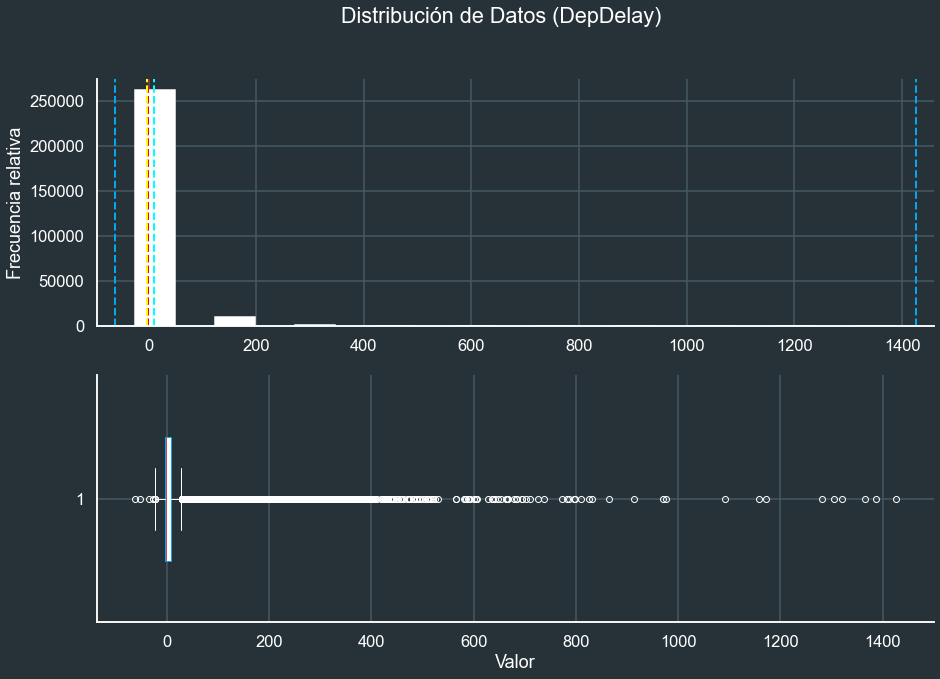

In [16]:
show_distribution('DepDelay',challenge_flight_df.DepDelay)

In [17]:
column = 'DepDelay'

challenge_flight_clean_df = challenge_flight_df.copy()

q75,q25 = np.percentile(challenge_flight_clean_df.loc[:,column],[75,25])
intr_qr = q75-q25
 
max = q75+(1.5*intr_qr)
min = q25-(1.5*intr_qr)
 
challenge_flight_clean_df.loc[challenge_flight_clean_df[column] < min,column] = np.nan
challenge_flight_clean_df.loc[challenge_flight_clean_df[column] > max,column] = np.nan

challenge_flight_clean_df.dropna(axis=0,inplace=True)

Mínimo:-23.00
Media:0.46
Mediana:-2.00
Moda:-3.00
Máximo:28.00



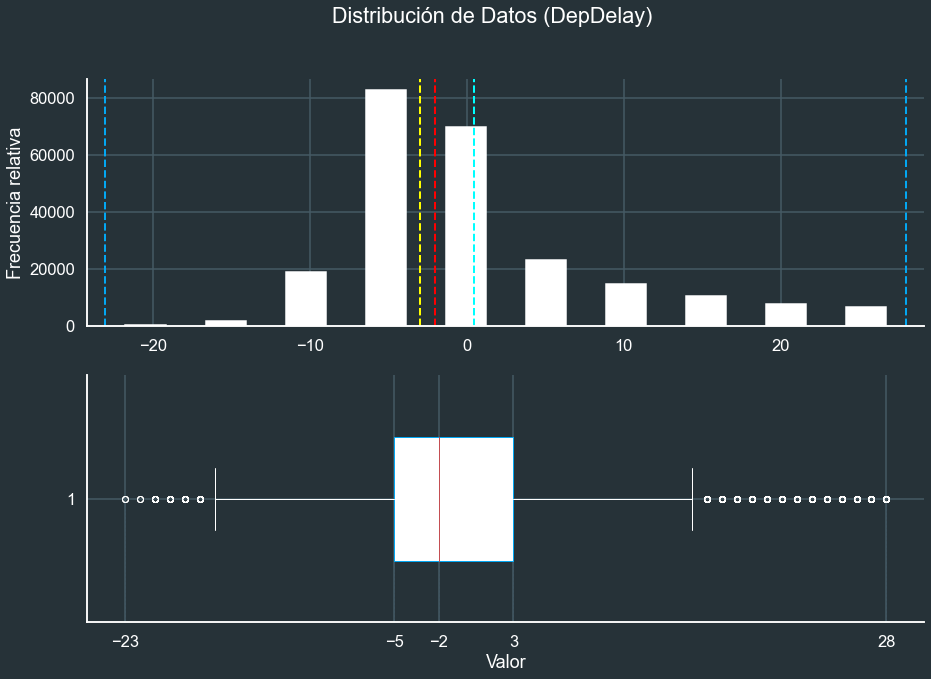

In [18]:
show_distribution(column, challenge_flight_clean_df[column],True)

<Figure size 432x288 with 0 Axes>

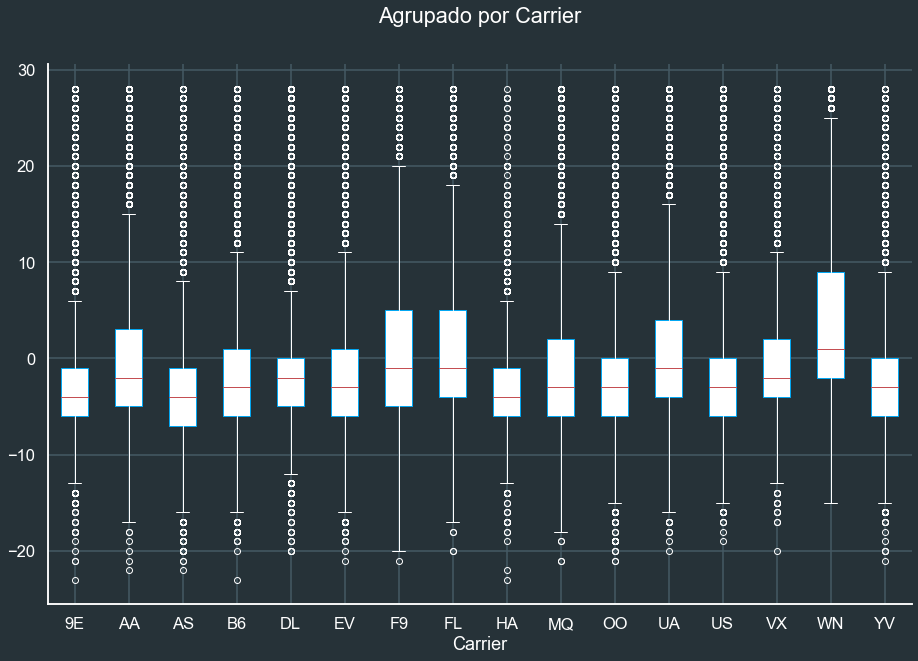

In [19]:
plt.clf()

fig, ax = plt.subplots(1, 1, figsize = (15,10))
c = 'white'
challenge_flight_clean_df.boxplot(ax=ax,column='DepDelay',by='Carrier',patch_artist=True,vert=True,widths=0.5,whis=1.5,
                boxprops=dict(facecolor=c, color='#03A7F2'),
                capprops=dict(color=c),
                whiskerprops=dict(color=c),
                flierprops=dict(color=c, markeredgecolor=c),
                medianprops=dict(color='r'))
fig.suptitle(f'Agrupado por Carrier', color='white')
ax.set_title('')

ax.set_xlabel('Carrier', color='white')
ax.tick_params(axis='x', colors='white',labelrotation=0)
ax.tick_params(axis='y', colors='white')
ax.grid(color='#455A64')
sns.despine(left=False, bottom=False)

In [20]:
local_path = 'output/flights_cleaned.csv'
challenge_flight_clean_df.to_csv(local_path)
datastore = Datastore.get(workspace,'workspaceblobstore')
datastore.upload(src_dir='output',target_path='')

"Datastore.upload" is deprecated after version 1.0.69. Please use "Dataset.File.upload_directory" to upload your files             from a local directory and create FileDataset in single method call. See Dataset API change notice at https://aka.ms/dataset-deprecation.


Uploading an estimated of 1 files
Uploading output\flights_cleaned.csv
Uploaded output\flights_cleaned.csv, 1 files out of an estimated total of 1
Uploaded 1 files


$AZUREML_DATAREFERENCE_workspaceblobstore

In [21]:
dataset = Dataset.Tabular.from_delimited_files(datastore.path('flights_cleaned.csv'))
dataset = dataset.register(workspace, 'Flights cleaned')